<a href="https://colab.research.google.com/github/kathyllin/Python-Pandas/blob/main/Segundo_exemplo_em_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
combustiveis_df = pd.read_excel('ca-2021-02.xlsx')

In [13]:
display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA


In [14]:
#Inserção simples de dado
combustiveis_df['Ativo'] = True

In [15]:
print(combustiveis_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168409 entries, 0 to 168408
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     168409 non-null  object        
 1   Estado - Sigla     168409 non-null  object        
 2   Municipio          168409 non-null  object        
 3   Revenda            168409 non-null  object        
 4   CNPJ da Revenda    168409 non-null  object        
 5   Nome da Rua        168409 non-null  object        
 6   Numero Rua         168353 non-null  object        
 7   Complemento        35057 non-null   object        
 8   Bairro             168043 non-null  object        
 9   Cep                168409 non-null  object        
 10  Produto            168409 non-null  object        
 11  Data da Coleta     168409 non-null  datetime64[ns]
 12  Valor de Venda     168409 non-null  float64       
 13  Valor de Compra    0 non-null       float64 

In [16]:
# Criar uma coluna "Obs" que tenha nela escrito "Melhor Cidade" quando a coluna Municipio for igual a SAO PAULO
combustiveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'SAO PAULO' else '' for municipio in combustiveis_df['Municipio']]


In [17]:
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['SAO PAULO', 'CAMPINAS', 'SALTO']),['Municipio', 'Obs']])

,Municipio,Obs
1601,SAO PAULO,MELHOR CIDADE
1602,SAO PAULO,MELHOR CIDADE
1603,SAO PAULO,MELHOR CIDADE
1604,SAO PAULO,MELHOR CIDADE
2607,CAMPINAS,
...,...,...
165925,SAO PAULO,MELHOR CIDADE
165926,SAO PAULO,MELHOR CIDADE
166122,SAO PAULO,MELHOR CIDADE
166123,SAO PAULO,MELHOR CIDADE


In [18]:
#como preencher uma coluna 'Valor de Venda - Status' que verifica se o valor de venda for maior que 6,5 reais, ele fala que ta caro, caro contrário, está barato
import numpy as np #numpy é pré-requisito do pandas 

combustiveis_df['Valor de Venda - Status'] = np.where(combustiveis_df['Valor de Venda'] > 6.5, 'Caro', 'Barato')
display(combustiveis_df[['Revenda','Valor de Venda','Valor de Venda - Status']])

,Revenda,Valor de Venda,Valor de Venda - Status
0,POSTO ARAPIRACA LTDA,6.799,Caro
1,POSTO ARAPIRACA LTDA,5.299,Barato
2,POSTO ARAPIRACA LTDA,5.549,Barato
3,POSTO ARAPIRACA LTDA,6.899,Caro
4,POSTO ARAPIRACA LTDA,5.649,Barato
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Barato
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Caro
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Barato
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Barato


In [19]:
# Calcular postos de gasolina por habitantes temos na amostragem de conbustiveis nov/2021
ibge_df = pd.read_csv('ibge_num_habitantes_estimado.csv', sep=';')
display(ibge_df)

,Municipio,Estado,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [20]:
#alterar o nome de coluna

ibge_df.rename(columns={'Estado':'Estado - Sigla'}, inplace=True)
display(ibge_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [21]:
# fazer um MERGE dos dois datasframes
colunas = ['Municipio','Estado - Sigla']
merge_df = combustiveis_df.merge(ibge_df, how='inner', on=colunas) #inner crusa as linhas dos dfs e só traz a linha que tiver correspondencia, caso contrio ele ignora
merge_left_df = combustiveis_df.merge(ibge_df, how='left', on=colunas)
print(merge_df.info())
print(merge_left_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Regiao - Sigla           20634 non-null  object        
 1   Estado - Sigla           20634 non-null  object        
 2   Municipio                20634 non-null  object        
 3   Revenda                  20634 non-null  object        
 4   CNPJ da Revenda          20634 non-null  object        
 5   Nome da Rua              20634 non-null  object        
 6   Numero Rua               20634 non-null  object        
 7   Complemento              3837 non-null   object        
 8   Bairro                   20634 non-null  object        
 9   Cep                      20634 non-null  object        
 10  Produto                  20634 non-null  object        
 11  Data da Coleta           20634 non-null  datetime64[ns]
 12  Valor de Venda           20634 n

In [22]:
display(merge_df)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Valor de Venda - Status,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,,Barato,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,,Barato,260690


In [23]:
# .dropne() destroi linhas ou colunas nulas
merge_df.dropna(axis=1, inplace=True) 
display(merge_df)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Ativo,Obs,Valor de Venda - Status,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,R$ / litro,RAIZEN,True,,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,R$ / litro,RAIZEN,True,,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,R$ / litro,RAIZEN,True,,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,R$ / litro,BRANCA,True,,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,R$ / litro,BRANCA,True,,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,R$ / litro,IPIRANGA,True,,Barato,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,R$ / litro,RAIZEN,True,,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,R$ / litro,RAIZEN,True,,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,R$ / litro,RAIZEN,True,,Barato,260690


In [24]:
# .drop() destroi linhas ou colunas desnecessárias 
colunas_drop = ['Regiao - Sigla','Nome da Rua', 'Numero Rua', 'Bairro','Cep','Data da Coleta', 'Unidade de Medida', 'Bandeira','Ativo','Obs', 'Valor de Venda - Status']
merge_df.drop(labels=colunas_drop, axis=1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado - Sigla     20634 non-null  object 
 1   Municipio          20634 non-null  object 
 2   Revenda            20634 non-null  object 
 3   CNPJ da Revenda    20634 non-null  object 
 4   Produto            20634 non-null  object 
 5   Valor de Venda     20634 non-null  float64
 6   NumHabitantes2021  20634 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB
None


In [25]:
merge_df.drop(labels='Valor de Venda',axis=1,inplace=True)

In [26]:
display(merge_df)

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Produto,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,GASOLINA,1555626
1,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,ETANOL,1555626
2,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,GASOLINA ADITIVADA,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,GASOLINA,1555626
4,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,ETANOL,1555626
...,...,...,...,...,...,...
20629,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,GASOLINA,260690
20630,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,DIESEL S10,260690
20631,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,GASOLINA ADITIVADA,260690
20632,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,ETANOL,260690


In [27]:
merge_df.drop_duplicates(inplace=True)
display(merge_df)

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Produto,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,GASOLINA,1555626
1,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,ETANOL,1555626
2,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,GASOLINA ADITIVADA,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,GASOLINA,1555626
4,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,ETANOL,1555626
...,...,...,...,...,...,...
20610,SP,INDAIATUBA,AUTO POSTO DISTRITO DE INDAIA LTDA,09.536.396/0001-60,DIESEL,260690
20611,SP,INDAIATUBA,AUTO POSTO DISTRITO DE INDAIA LTDA,09.536.396/0001-60,ETANOL,260690
20612,SP,INDAIATUBA,AUTO POSTO DISTRITO DE INDAIA LTDA,09.536.396/0001-60,GASOLINA,260690
20616,SP,INDAIATUBA,AUTO POSTO NAMORADA II LTDA.,18.043.211/0001-77,DIESEL S10,260690


In [28]:
#Agrupar e contar quantos postos tem na cidade
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "Numero de Postos"}, inplace=True)
display(postos_por_municipio_df)

,,,Numero de Postos,Produto
Estado - Sigla,Municipio,NumHabitantes2021,,
AC,RIO BRANCO,419452,192,192
GO,GOIANIA,1555626,362,362
MG,BELO HORIZONTE,2530701,181,181
MS,CAMPO GRANDE,916001,445,445
PR,CURITIBA,1963726,412,412
RJ,RIO DE JANEIRO,6775561,1679,1679
RN,NATAL,803739,169,169
RO,PORTO VELHO,548952,146,146
RS,PORTO ALEGRE,1492530,253,253


In [30]:
#Agrupar e contar quantos postos tem na cidade..
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)
#display(postos_por_municipio_df.info())
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

postos_por_municipio_df['NumHabitantesPorPosto'] = postos_por_municipio_df['NumHabitantes2021'] / postos_por_municipio_df['NumPostos']
#display(postos_por_municipio_df.info())
display(postos_por_municipio_df)

,Estado - Sigla,Municipio,NumHabitantes2021,NumPostos,Produto,NumHabitantesPorPosto
0,AC,RIO BRANCO,419452,192,192,2184.645833
1,GO,GOIANIA,1555626,362,362,4297.309392
2,MG,BELO HORIZONTE,2530701,181,181,13981.773481
3,MS,CAMPO GRANDE,916001,445,445,2058.429213
4,PR,CURITIBA,1963726,412,412,4766.325243
5,RJ,RIO DE JANEIRO,6775561,1679,1679,4035.474092
6,RN,NATAL,803739,169,169,4755.852071
7,RO,PORTO VELHO,548952,146,146,3759.945205
8,RS,PORTO ALEGRE,1492530,253,253,5899.328063
9,SP,CAMPINAS,1223237,219,219,5585.557078


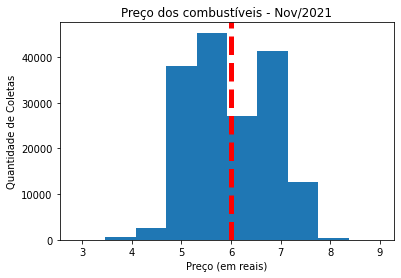

In [31]:
#Vamos brincar de gráficos!!!

import matplotlib.pyplot as plt

plt.hist(combustiveis_df['Valor de Venda'])
#Vamos colocar um título no gráfico
plt.title("Preço dos combustíveis - Nov/2021")
#Rótulo horizontal e vertical
plt.xlabel("Preço (em reais)")
plt.ylabel("Quantidade de Coletas")

#Traça a linha vermelha tracejada com o preço médio
plt.axvline(combustiveis_df['Valor de Venda'].mean(), color='red', linestyle='dashed', linewidth=5)


#"Plota" o gráfico
plt.show()

In [32]:
#Visualização do consumo médio
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

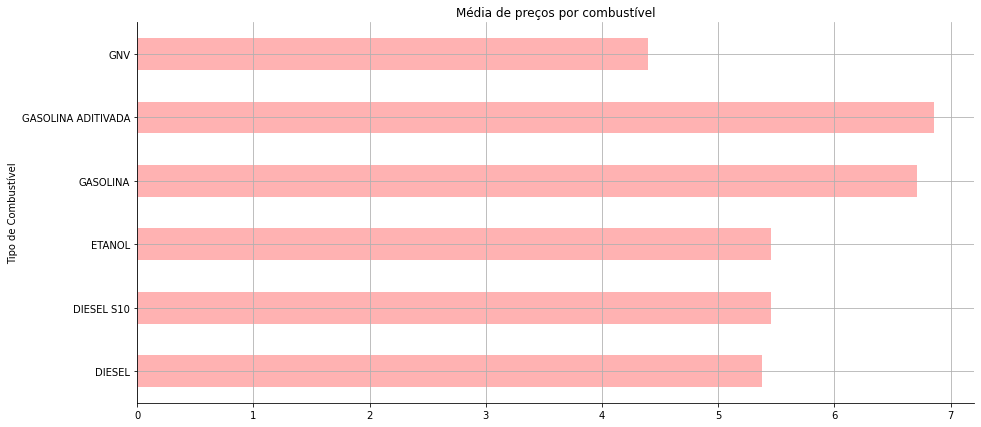

In [33]:
import seaborn as sns

#Vou definir a área do gráfico
plt.figure(figsize=(15,7))

#Plotar o gráfico
c_mean.plot(
    kind="barh",
    xlabel="Tipo de Combustível",
    ylabel="Preço reais/litro",
    title="Média de preços por combustível",
    color="red",
    alpha=0.3
)

#Grid
plt.grid()

#Remover as linhas superior e lateral direita do gráfico 
sns.despine()

#Exibe
plt.show()

In [34]:
#c_mean.reset_index(inplace=True)
display(c_mean)

excel = "por_litro.xlsx"
c_mean.to_excel(excel, "Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [35]:


#Vamor personalizar a planilha Excel...
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

#Vai abrir o Excel no openpyxl
wb = load_workbook(excel) # wb = Workbook

#Pegar a planilha certa... usando o Sheet Name (nome da planilha)
ws = wb['Sumário'] # Work Sheet -> planilha atual, ativa, de trabalho

#Vamos pintar o cabeçalho da tabela de "cinzinha"
cinzinha = PatternFill("solid", fgColor="CCCCCC")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill = cinzinha

#Onde o preço do combustível for maior ou igual a 6,5 reais (6.5) pinta a fonte
#de vermelho e deixa negrito...
MAX_ROW = ws.max_row
num_linha = 2
while (num_linha <= MAX_ROW):
  coord = 'B'+str(num_linha) #coord="B{0}".format(num_linha)
  if ws[coord].value >= 6.5:
    ws[coord].font = Font(bold=True, color="FF0000")
  num_linha = num_linha + 1
#Salvar o Excel
wb.save(excel)

     
